# import necessary library

In [1]:
#import libraries
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE



# read data

In [2]:
#import data
df = pd.read_csv("mxmh_survey_results.csv")
df

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,10/30/2022 14:37:28,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,...,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve,I understand.
732,11/1/2022 22:26:42,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,...,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve,I understand.
733,11/3/2022 23:24:38,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,...,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve,I understand.
734,11/4/2022 17:31:47,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,...,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve,I understand.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

# data preprocessing

## checking duplicated

In [4]:
df.duplicated().sum()

0

## checking missing value

In [5]:
df.isnull().sum()

Timestamp                         0
Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                     

There are 8 attributes with missing values which are age, primary streaming service, while working, instrumentalist, composer, foreign language, BPM and Music effect. Since the missing value of bpm is too much (more than 1/7 observations) hence we decide to drop it.

## checking for outliers

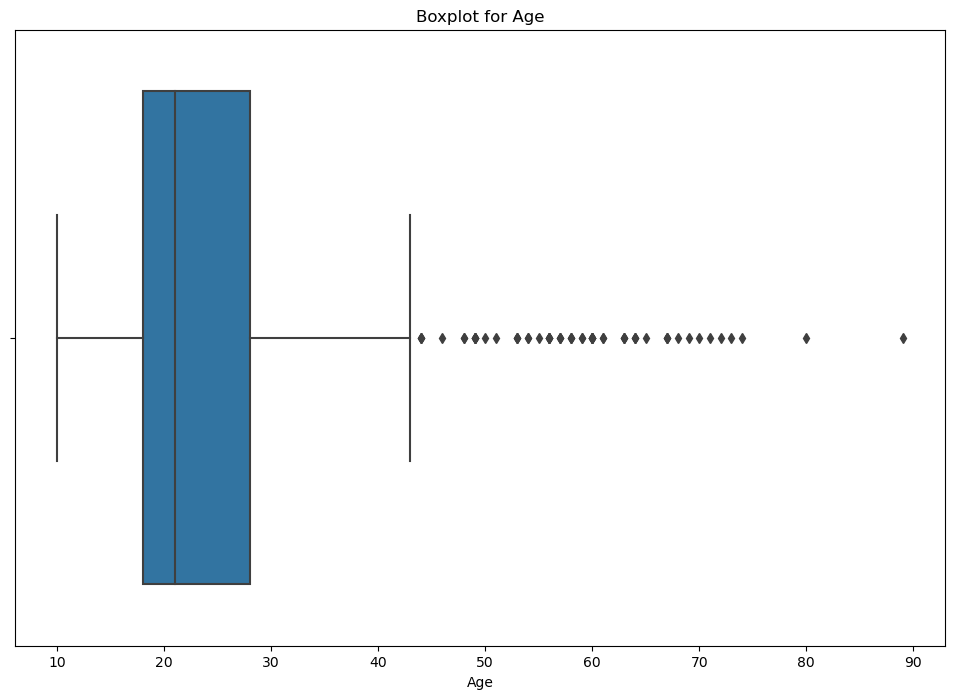

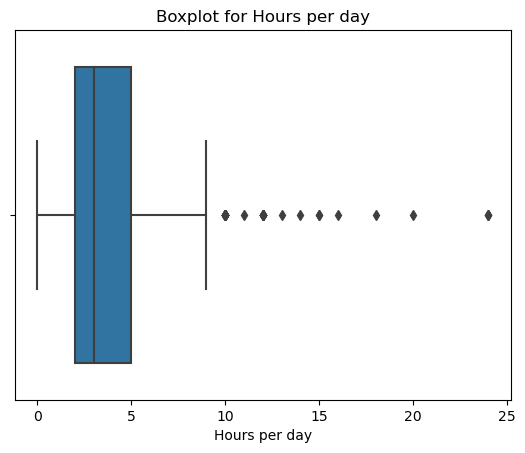

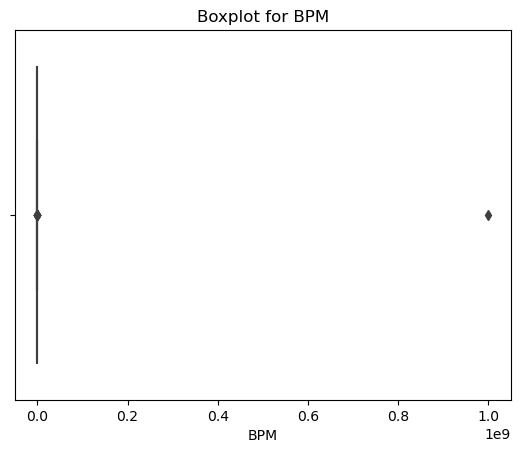

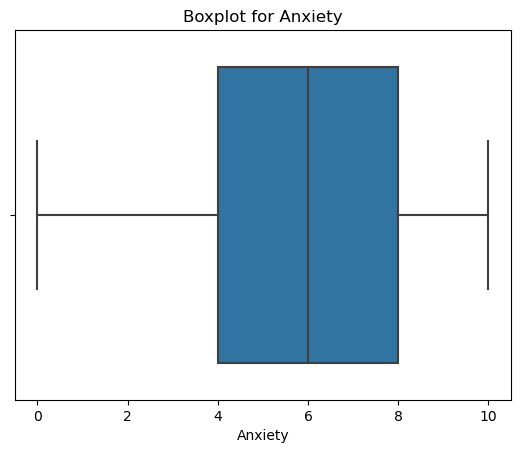

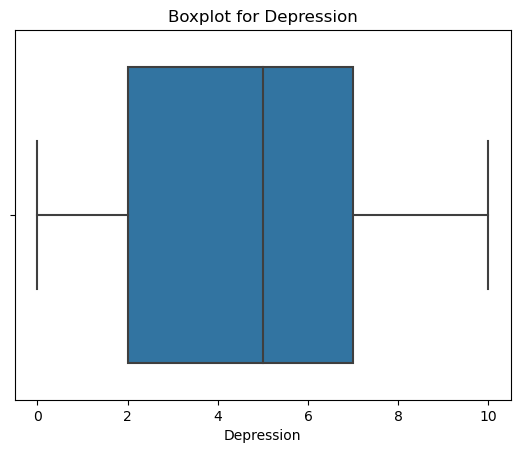

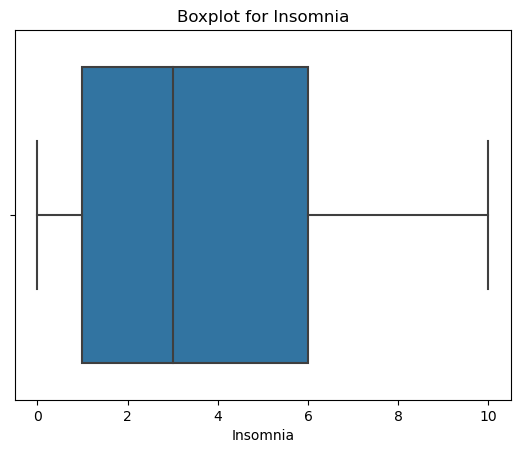

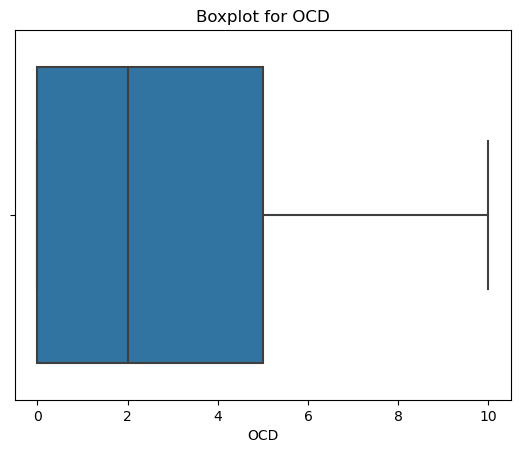

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt


columns_of_interest = ["Age", "Hours per day", "BPM", "Anxiety", "Depression", "Insomnia", "OCD"]

# Create a boxplot for each selected column
plt.figure(figsize=(12, 8))
for column in columns_of_interest:
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot for {column}')
    plt.show()


Hours per day exist outlier around 24 hours(1day)which is not reasonable, therefore we need to deal with it.

BPM exist extreme value thus need to deal with it 

C:\Users\ACER\AppData\Local\Temp\ipykernel_16836\3687548621.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['BPM'])


<AxesSubplot: xlabel='BPM', ylabel='Density'>

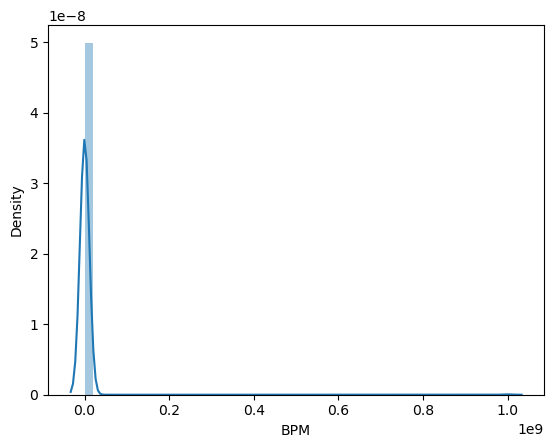

In [7]:
# Plotting Distribution Graph
sns.distplot(df['BPM'])

We found that there is an extreme large value(1.000000e+09) exist in BPM, thus we will check for it

## checking for class balancing of response variable

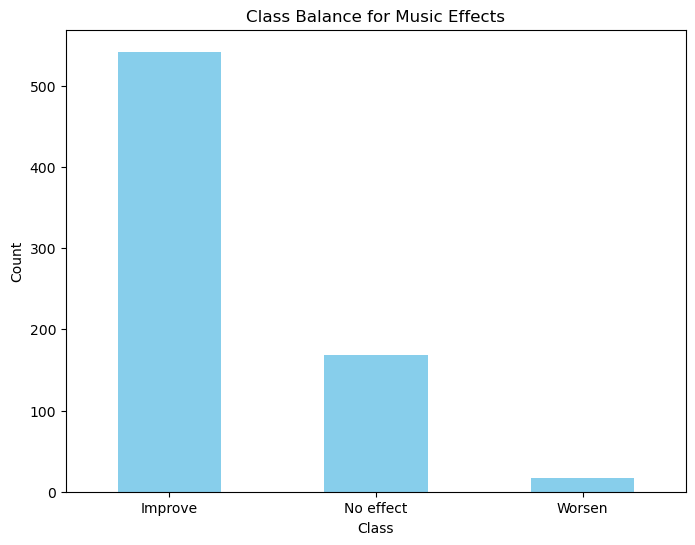

In [8]:

class_balance = df['Music effects'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
class_balance.plot(kind='bar', color='skyblue')
plt.title('Class Balance for Music Effects')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


In [9]:
class_balance = df['Music effects'].value_counts()
print(class_balance)


Improve      542
No effect    169
Worsen        17
Name: Music effects, dtype: int64


# Imputation for missing value

In [10]:
#fill with mode since categorical data type
df['Primary streaming service'] = df['Primary streaming service'].fillna(df['Primary streaming service'].mode()[0])
df['While working'] = df['While working'].fillna(df['While working'].mode()[0])
df['Instrumentalist'] = df['Instrumentalist'].fillna(df['Instrumentalist'].mode()[0])
df['Composer'] = df['Composer'].fillna(df['Composer'].mode()[0])
df['Foreign languages'] = df['Foreign languages'].fillna(df['Foreign languages'].mode()[0])
df['Music effects'] = df['Music effects'].fillna(df['Music effects'].mode()[0])

In [11]:
impute = KNNImputer()
simple_impute = SimpleImputer(missing_values='NAN', strategy='mean')
df['Age'] = impute.fit_transform(df['Age'].values.reshape(-1,1))
df['BPM'] = impute.fit_transform(df['BPM'].values.reshape(-1,1))

In [12]:
df.isnull().sum()

Timestamp                       0
Age                             0
Primary streaming service       0
Hours per day                   0
While working                   0
Instrumentalist                 0
Composer                        0
Fav genre                       0
Exploratory                     0
Foreign languages               0
BPM                             0
Frequency [Classical]           0
Frequency [Country]             0
Frequency [EDM]                 0
Frequency [Folk]                0
Frequency [Gospel]              0
Frequency [Hip hop]             0
Frequency [Jazz]                0
Frequency [K pop]               0
Frequency [Latin]               0
Frequency [Lofi]                0
Frequency [Metal]               0
Frequency [Pop]                 0
Frequency [R&B]                 0
Frequency [Rap]                 0
Frequency [Rock]                0
Frequency [Video game music]    0
Anxiety                         0
Depression                      0
Insomnia      

# Handle extreme value and capping outliers

In [13]:


# Calculate the IQR (Interquartile Range)
Q1 = df['BPM'].quantile(0.25)
Q3 = df['BPM'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['BPM'] < lower_bound) | (df['BPM'] > upper_bound)]

# Display only the 'BPM' column of outliers
print("BPM column outliers:")
print(outliers['BPM'])


BPM column outliers:
10     1.589948e+06
12     1.589948e+06
15     1.589948e+06
30     1.589948e+06
32     1.589948e+06
           ...     
688    1.589948e+06
700    1.589948e+06
706    1.589948e+06
712    1.589948e+06
717    1.589948e+06
Name: BPM, Length: 114, dtype: float64


In [14]:


# Calculate the median of the 'BPM' column
median_bpm = df['BPM'].median()

# Replace extreme values with the median
df['BPM'] = df['BPM'].apply(lambda x: median_bpm if x == 999999999 else x)

# Calculate the IQR (Interquartile Range) after the initial replacement
Q1 = df['BPM'].quantile(0.25)
Q3 = df['BPM'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for capping
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Apply capping to remaining outliers
df['BPM'] = df['BPM'].apply(lambda x: upper_bound if x > upper_bound else lower_bound if x < lower_bound else x)

In [15]:
# Calculate the IQR (Interquartile Range)
Q1 = df['Hours per day'].quantile(0.25)
Q3 = df['Hours per day'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Hours per day'] < lower_bound) | (df['Hours per day'] > upper_bound)]

# Display only the 'hours_per_day' column of outliers
print("Hours per day column outliers:")
print(outliers['Hours per day'])


Hours per day column outliers:
17     12.0
18     24.0
26     12.0
53     12.0
77     10.0
95     10.0
125    10.0
142    10.0
164    10.0
223    12.0
257    10.0
280    10.0
290    20.0
320    10.0
336    10.0
341    10.0
347    16.0
357    10.0
359    15.0
366    24.0
407    14.0
417    12.0
420    10.0
426    13.0
464    10.0
465    10.0
466    10.0
485    15.0
586    10.0
587    10.0
589    10.0
598    12.0
611    12.0
638    10.0
655    12.0
659    12.0
672    11.0
673    10.0
695    24.0
726    18.0
Name: Hours per day, dtype: float64


In [16]:
# Calculate the median of the 'hours_per_day' column
median_hours_per_day = df['Hours per day'].median()

# Replace extreme values with the median
df['Hours per day'] = df['Hours per day'].apply(lambda x: median_hours_per_day if x == 24 else x)

# Apply capping to remaining outliers
df['Hours per day'] = df['Hours per day'].apply(lambda x: upper_bound if x > upper_bound else lower_bound if x < lower_bound else x)


In [17]:
# Calculate the IQR (Interquartile Range)
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for capping
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Apply capping to remaining outliers
df['Age'] = df['Age'].apply(lambda x: upper_bound if x > upper_bound else lower_bound if x < lower_bound else x)


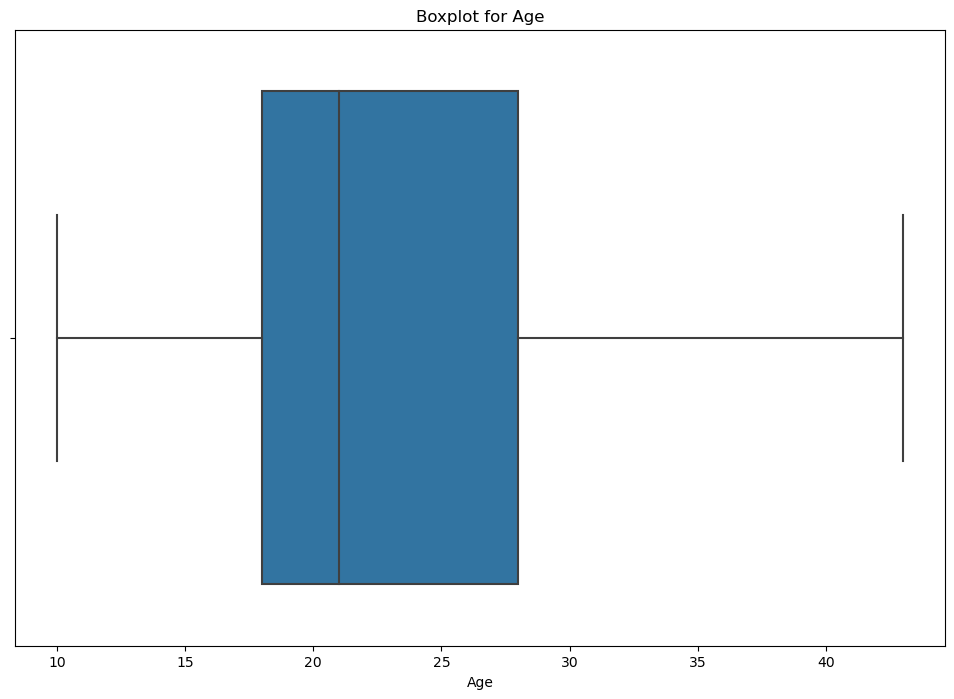

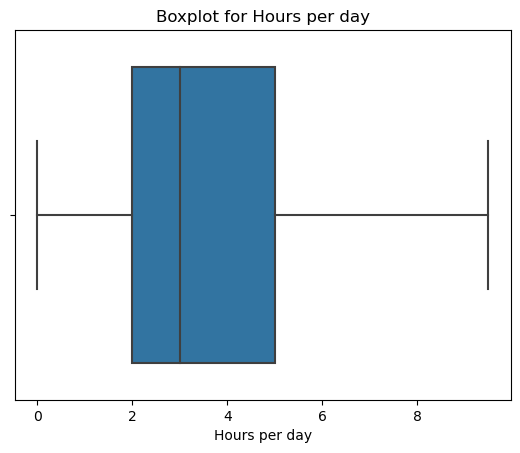

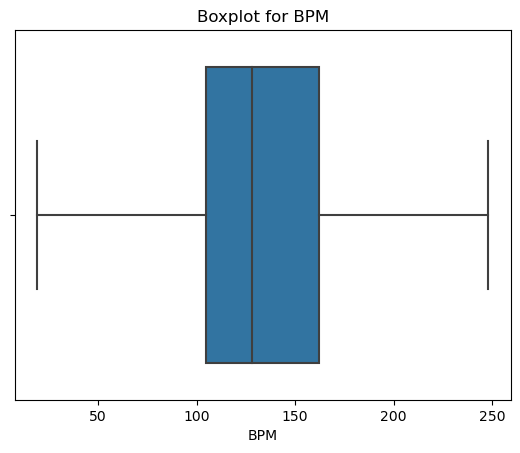

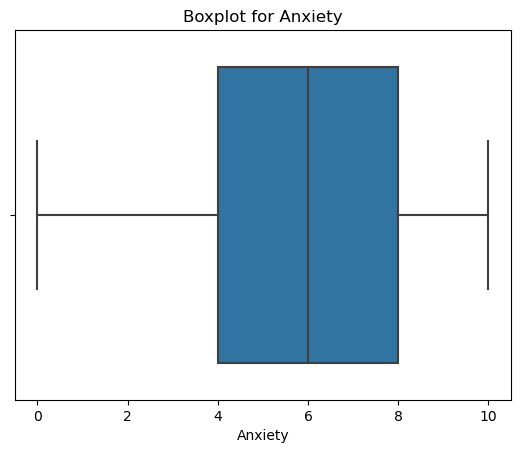

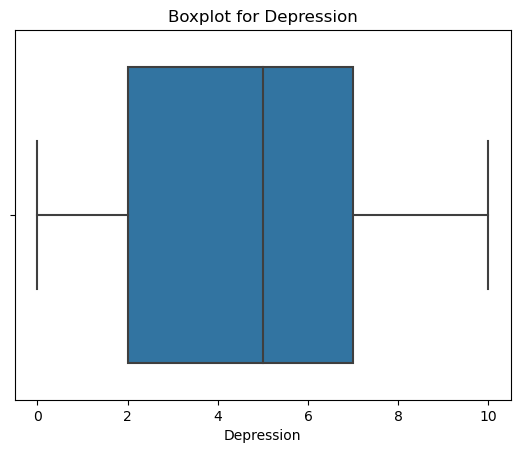

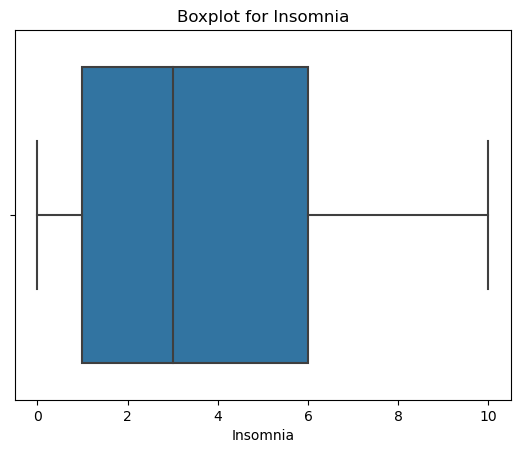

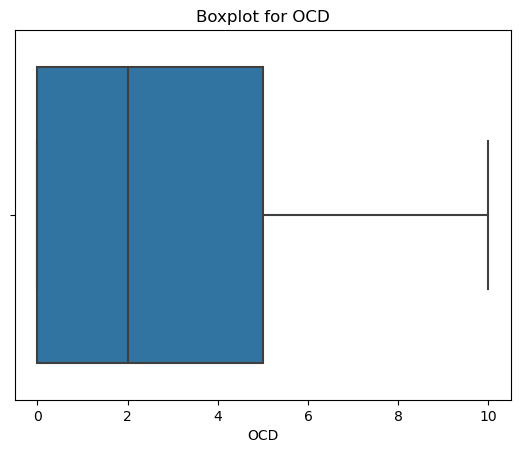

In [18]:

columns_of_interest = ["Age", "Hours per day", "BPM", "Anxiety", "Depression", "Insomnia", "OCD"]

# Create a boxplot for each selected column
plt.figure(figsize=(12, 8))
for column in columns_of_interest:
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot for {column}')
    plt.show()


C:\Users\ACER\AppData\Local\Temp\ipykernel_16836\3687548621.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['BPM'])


<AxesSubplot: xlabel='BPM', ylabel='Density'>

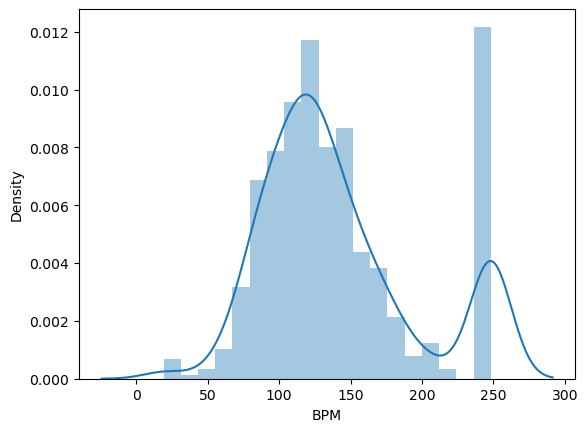

In [19]:
# Plotting Distribution Graph
sns.distplot(df['BPM'])

In [20]:
df.head(5)

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,Improve,I understand.
1,8/27/2022 19:57:31,43.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,Improve,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,43.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


# drop no related column 

In [21]:
df = df.drop(["Timestamp","Permissions","BPM"],axis=1)

In [22]:
df

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,Frequency [Classical],...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
0,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,Rarely,...,Very frequently,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,Improve
1,43.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,Sometimes,...,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,Improve
2,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,Never,...,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect
3,43.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,Sometimes,...,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve
4,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,Never,...,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,Very frequently,...,Very frequently,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve
732,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,Rarely,...,Very frequently,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve
733,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,Rarely,...,Sometimes,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve
734,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,Very frequently,...,Never,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve


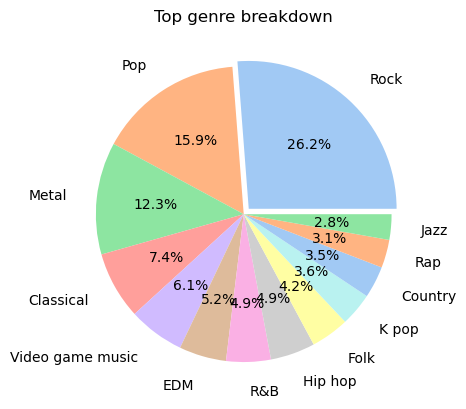

In [23]:
genre = df["Fav genre"].value_counts().loc[lambda x: x > 10]
total_count = genre.sum()

# Calculate percentages
percentages = genre / total_count * 100

# Plot the pie chart
genre.plot(kind='pie', labeldistance=1.2, explode=[0.05, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,],
           colors=sns.color_palette('pastel')[0:13], autopct='%1.1f%%')

plt.title('Top genre breakdown')
plt.ylabel("")
plt.show()


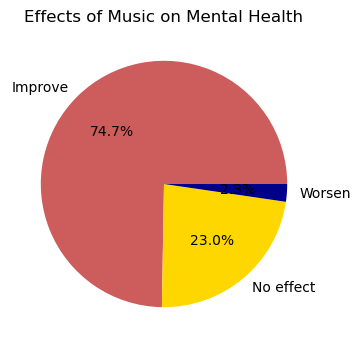

In [24]:


plt.figure(figsize=(5, 4))
plt.title('Effects of Music on Mental Health')

effects = df['Music effects'].value_counts()

# Calculate percentages
total_count = effects.sum()
percentages = effects / total_count * 100

# Plot the pie chart with percentages
effects.plot(kind='pie', colors=["indianred", "gold", "darkblue"], autopct='%1.1f%%', ylabel='')
plt.show()


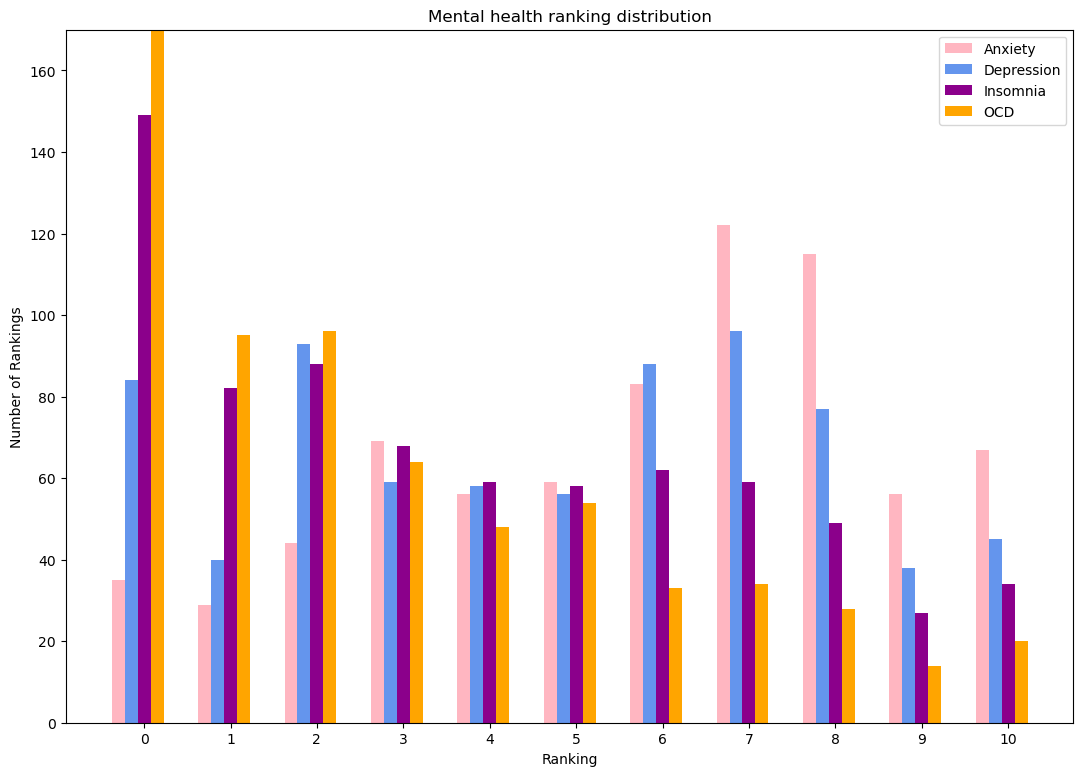

In [25]:
m_all = ["Anxiety", "Depression", "Insomnia", "OCD"]

mental_df = df[m_all]
mental_df.round(0).astype(int)

disorder_count = []
for disorder in m_all:
    x=0
    while x !=11:
        count =  (mental_df[disorder].values == x).sum()
        disorder_count.append(count)
        x +=1

labels = ['0','1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
x = np.arange(len(labels))
width = 0.15

fig, ax = plt.subplots(figsize=(13, 9))

b1 = ax.bar(x-2*width, disorder_count[0:11], width, label="Anxiety", color = 'lightpink')
b2 = ax.bar(x-width, disorder_count[11:22], width, label="Depression", color = 'cornflowerblue')
b3 = ax.bar(x, disorder_count[22:33], width, label="Insomnia", color = 'darkmagenta')
b4 = ax.bar(x+width, disorder_count[33:], width, label="OCD", color = 'orange')

ax.set_ylim([0, 170])
ax.set_ylabel('Number of Rankings')
ax.set_xlabel('Ranking')
ax.set_title('Mental health ranking distribution')
ax.set_xticks(x, labels)
ax.legend()

plt.show()

Text(0.5, 1.0, 'Streaming services by Age')

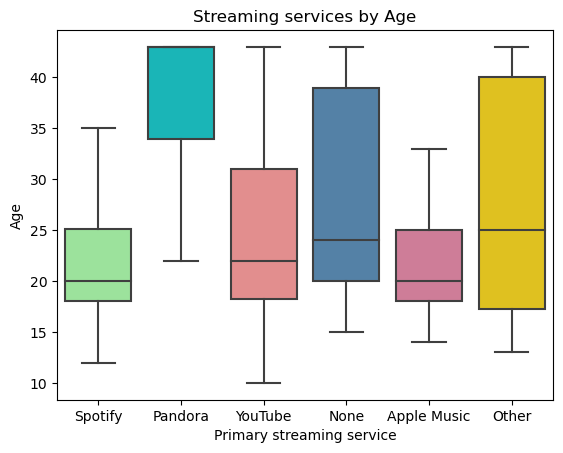

In [26]:

s_colors2 = ['lightgreen', 'darkturquoise', 'lightcoral', 'steelblue', 'palevioletred', 'gold']

df.replace(['Other streaming service', 'I do not use a streaming service.', 'YouTube Music'],
                       ['Other', 'None', 'YouTube'], inplace=True)

bplot = sns.boxplot(data=df, x="Primary streaming service", y = "Age",
            showfliers = False,
            palette = s_colors2)

plt.title('Streaming services by Age')

C:\Users\ACER\AppData\Local\Temp\ipykernel_16836\1472583737.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=df['Fav genre'], y=df['Age'], ci=None)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Latin'),
  Text(1, 0, 'Rock'),
  Text(2, 0, 'Video game music'),
  Text(3, 0, 'Jazz'),
  Text(4, 0, 'R&B'),
  Text(5, 0, 'K pop'),
  Text(6, 0, 'Country'),
  Text(7, 0, 'EDM'),
  Text(8, 0, 'Hip hop'),
  Text(9, 0, 'Pop'),
  Text(10, 0, 'Rap'),
  Text(11, 0, 'Classical'),
  Text(12, 0, 'Metal'),
  Text(13, 0, 'Folk'),
  Text(14, 0, 'Lofi'),
  Text(15, 0, 'Gospel')])

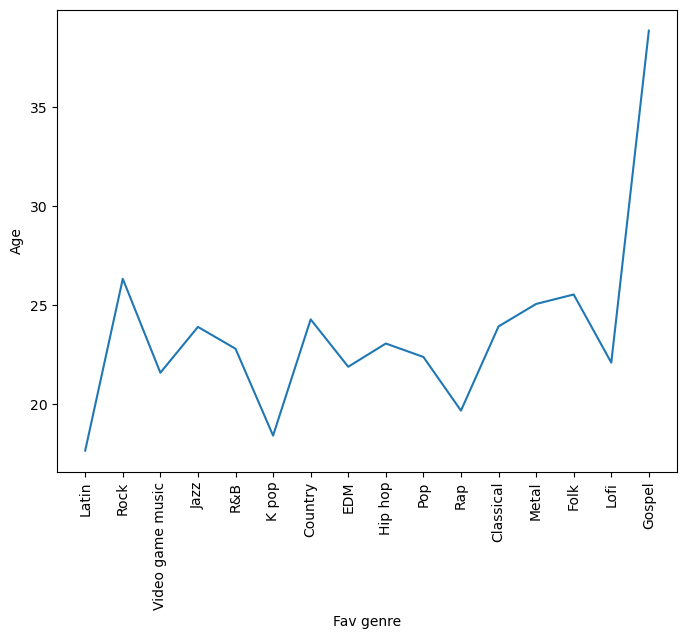

In [27]:
plt.figure(figsize=(8,6))
sns.lineplot(x=df['Fav genre'], y=df['Age'], ci=None)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Latin'),
  Text(1, 0, 'Rock'),
  Text(2, 0, 'Video game music'),
  Text(3, 0, 'Jazz'),
  Text(4, 0, 'R&B'),
  Text(5, 0, 'K pop'),
  Text(6, 0, 'Country'),
  Text(7, 0, 'EDM'),
  Text(8, 0, 'Hip hop'),
  Text(9, 0, 'Pop'),
  Text(10, 0, 'Rap'),
  Text(11, 0, 'Classical'),
  Text(12, 0, 'Metal'),
  Text(13, 0, 'Folk'),
  Text(14, 0, 'Lofi'),
  Text(15, 0, 'Gospel')])

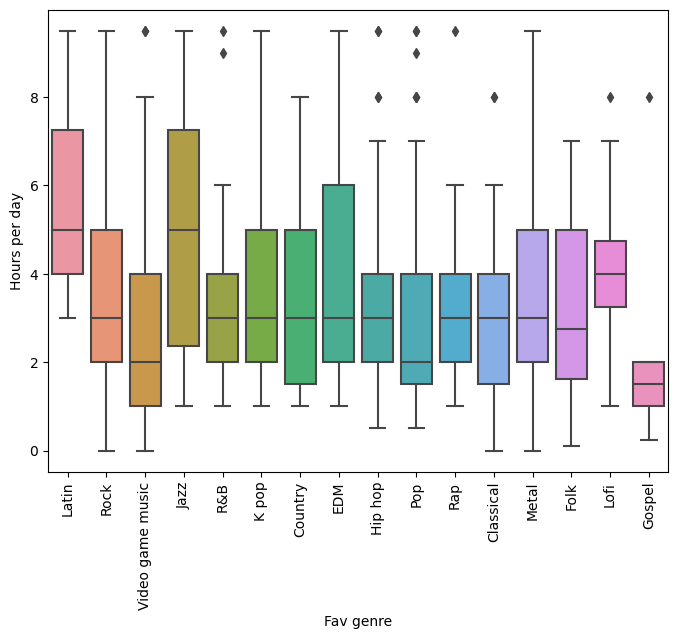

In [28]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df['Fav genre'], y=df['Hours per day'])
plt.xticks(rotation=90)

In [29]:
for disorder in m_all:
    d_avg = str(round(df[disorder].mean(), 2))
    print(disorder + ' average: ' + d_avg)

Anxiety average: 5.84
Depression average: 4.8
Insomnia average: 3.74
OCD average: 2.64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Latin'),
  Text(1, 0, 'Rock'),
  Text(2, 0, 'Video game music'),
  Text(3, 0, 'Jazz'),
  Text(4, 0, 'R&B'),
  Text(5, 0, 'K pop'),
  Text(6, 0, 'Country'),
  Text(7, 0, 'EDM'),
  Text(8, 0, 'Hip hop'),
  Text(9, 0, 'Pop'),
  Text(10, 0, 'Rap'),
  Text(11, 0, 'Classical'),
  Text(12, 0, 'Metal'),
  Text(13, 0, 'Folk'),
  Text(14, 0, 'Lofi'),
  Text(15, 0, 'Gospel')])

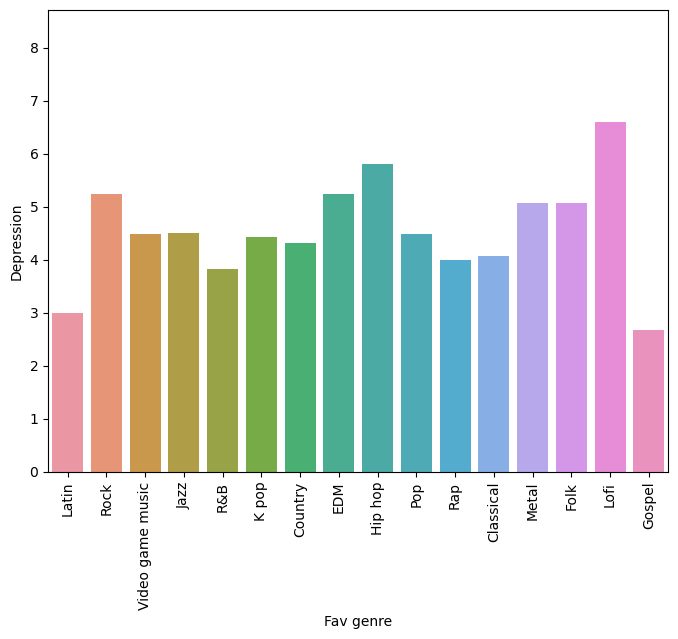

In [30]:
plt.figure(figsize=(8,6))
sns.barplot(x=df['Fav genre'], y=df['Depression'], errwidth=0)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Latin'),
  Text(1, 0, 'Rock'),
  Text(2, 0, 'Video game music'),
  Text(3, 0, 'Jazz'),
  Text(4, 0, 'R&B'),
  Text(5, 0, 'K pop'),
  Text(6, 0, 'Country'),
  Text(7, 0, 'EDM'),
  Text(8, 0, 'Hip hop'),
  Text(9, 0, 'Pop'),
  Text(10, 0, 'Rap'),
  Text(11, 0, 'Classical'),
  Text(12, 0, 'Metal'),
  Text(13, 0, 'Folk'),
  Text(14, 0, 'Lofi'),
  Text(15, 0, 'Gospel')])

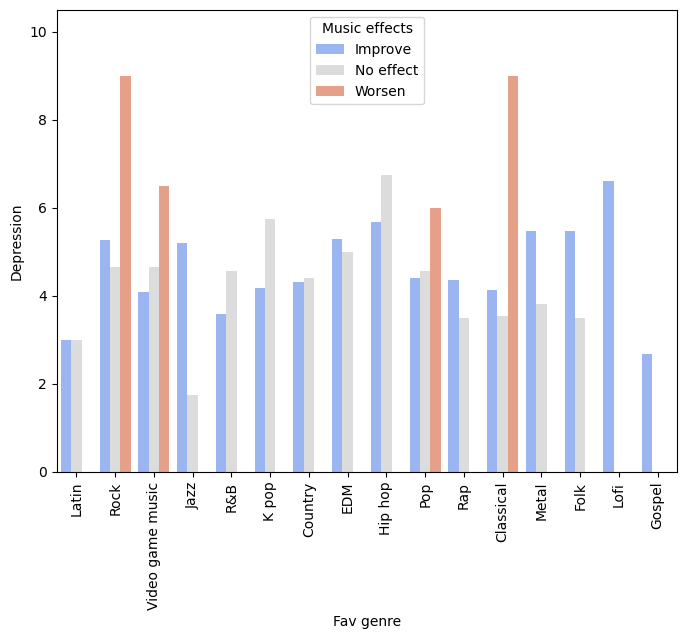

In [31]:
plt.figure(figsize=(8,6))
sns.barplot(x=df['Fav genre'], y=df['Depression'], hue=df['Music effects'], errwidth=0, palette='coolwarm')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Latin'),
  Text(1, 0, 'Rock'),
  Text(2, 0, 'Video game music'),
  Text(3, 0, 'Jazz'),
  Text(4, 0, 'R&B'),
  Text(5, 0, 'K pop'),
  Text(6, 0, 'Country'),
  Text(7, 0, 'EDM'),
  Text(8, 0, 'Hip hop'),
  Text(9, 0, 'Pop'),
  Text(10, 0, 'Rap'),
  Text(11, 0, 'Classical'),
  Text(12, 0, 'Metal'),
  Text(13, 0, 'Folk'),
  Text(14, 0, 'Lofi'),
  Text(15, 0, 'Gospel')])

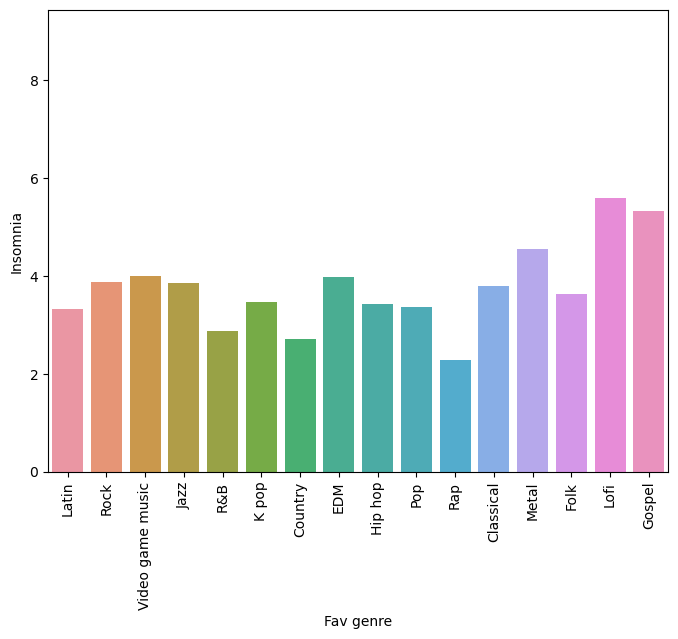

In [32]:
plt.figure(figsize=(8,6))
sns.barplot(x=df['Fav genre'], y=df['Insomnia'], errwidth=0)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Latin'),
  Text(1, 0, 'Rock'),
  Text(2, 0, 'Video game music'),
  Text(3, 0, 'Jazz'),
  Text(4, 0, 'R&B'),
  Text(5, 0, 'K pop'),
  Text(6, 0, 'Country'),
  Text(7, 0, 'EDM'),
  Text(8, 0, 'Hip hop'),
  Text(9, 0, 'Pop'),
  Text(10, 0, 'Rap'),
  Text(11, 0, 'Classical'),
  Text(12, 0, 'Metal'),
  Text(13, 0, 'Folk'),
  Text(14, 0, 'Lofi'),
  Text(15, 0, 'Gospel')])

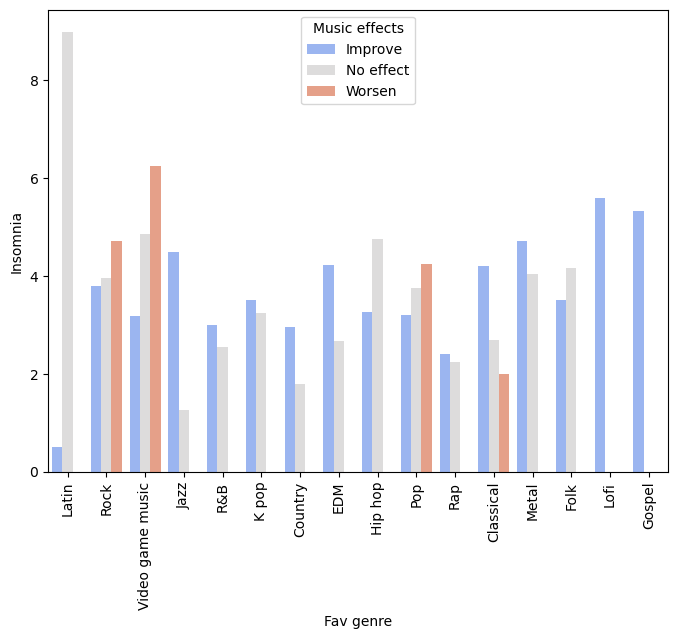

In [33]:
plt.figure(figsize=(8,6))
sns.barplot(x=df['Fav genre'], y=df['Insomnia'], hue=df['Music effects'], errwidth=0, palette='coolwarm')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Latin'),
  Text(1, 0, 'Rock'),
  Text(2, 0, 'Video game music'),
  Text(3, 0, 'Jazz'),
  Text(4, 0, 'R&B'),
  Text(5, 0, 'K pop'),
  Text(6, 0, 'Country'),
  Text(7, 0, 'EDM'),
  Text(8, 0, 'Hip hop'),
  Text(9, 0, 'Pop'),
  Text(10, 0, 'Rap'),
  Text(11, 0, 'Classical'),
  Text(12, 0, 'Metal'),
  Text(13, 0, 'Folk'),
  Text(14, 0, 'Lofi'),
  Text(15, 0, 'Gospel')])

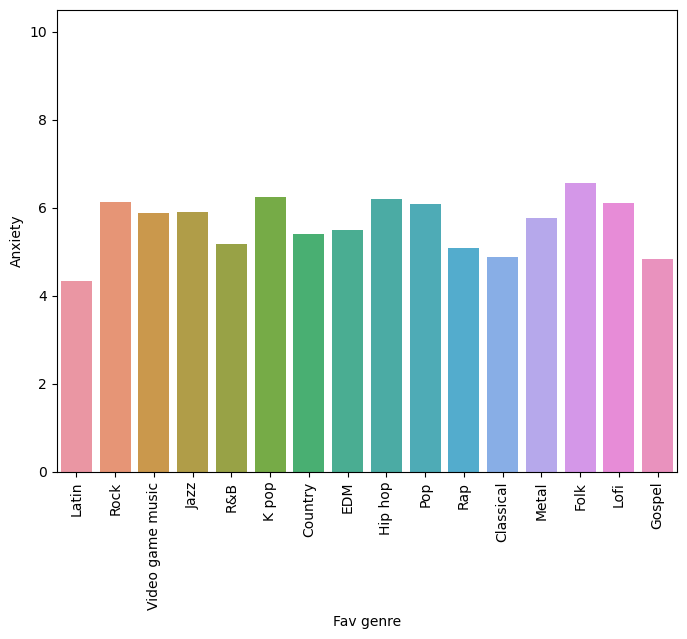

In [34]:
plt.figure(figsize=(8,6))
sns.barplot(x=df['Fav genre'], y=df['Anxiety'], errwidth=0)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Latin'),
  Text(1, 0, 'Rock'),
  Text(2, 0, 'Video game music'),
  Text(3, 0, 'Jazz'),
  Text(4, 0, 'R&B'),
  Text(5, 0, 'K pop'),
  Text(6, 0, 'Country'),
  Text(7, 0, 'EDM'),
  Text(8, 0, 'Hip hop'),
  Text(9, 0, 'Pop'),
  Text(10, 0, 'Rap'),
  Text(11, 0, 'Classical'),
  Text(12, 0, 'Metal'),
  Text(13, 0, 'Folk'),
  Text(14, 0, 'Lofi'),
  Text(15, 0, 'Gospel')])

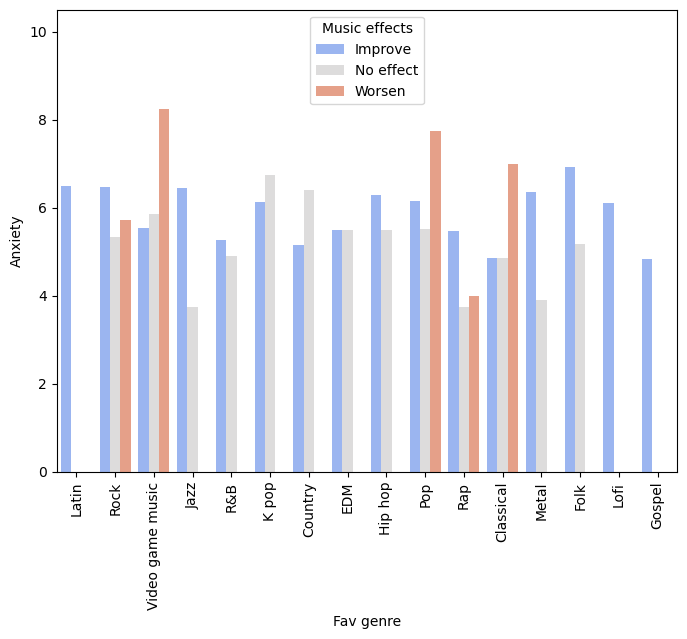

In [35]:
plt.figure(figsize=(8,6))
sns.barplot(x=df['Fav genre'], y=df['Anxiety'], hue=df['Music effects'], errwidth=0, palette='coolwarm')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Latin'),
  Text(1, 0, 'Rock'),
  Text(2, 0, 'Video game music'),
  Text(3, 0, 'Jazz'),
  Text(4, 0, 'R&B'),
  Text(5, 0, 'K pop'),
  Text(6, 0, 'Country'),
  Text(7, 0, 'EDM'),
  Text(8, 0, 'Hip hop'),
  Text(9, 0, 'Pop'),
  Text(10, 0, 'Rap'),
  Text(11, 0, 'Classical'),
  Text(12, 0, 'Metal'),
  Text(13, 0, 'Folk'),
  Text(14, 0, 'Lofi'),
  Text(15, 0, 'Gospel')])

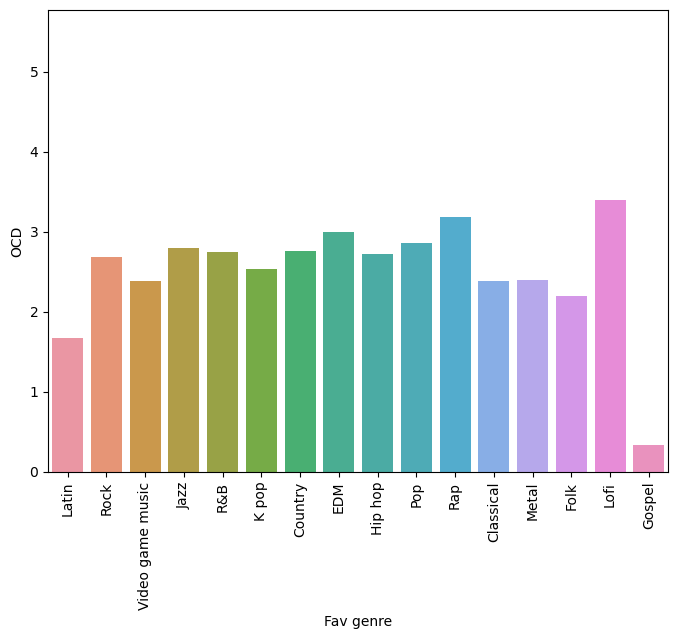

In [36]:
plt.figure(figsize=(8,6))
sns.barplot(x=df['Fav genre'], y=df['OCD'], errwidth=0)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Latin'),
  Text(1, 0, 'Rock'),
  Text(2, 0, 'Video game music'),
  Text(3, 0, 'Jazz'),
  Text(4, 0, 'R&B'),
  Text(5, 0, 'K pop'),
  Text(6, 0, 'Country'),
  Text(7, 0, 'EDM'),
  Text(8, 0, 'Hip hop'),
  Text(9, 0, 'Pop'),
  Text(10, 0, 'Rap'),
  Text(11, 0, 'Classical'),
  Text(12, 0, 'Metal'),
  Text(13, 0, 'Folk'),
  Text(14, 0, 'Lofi'),
  Text(15, 0, 'Gospel')])

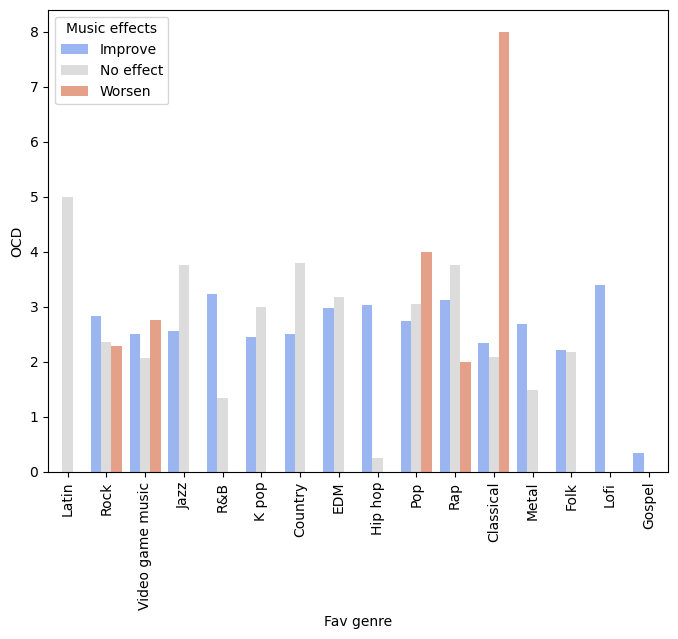

In [37]:
plt.figure(figsize=(8,6))
sns.barplot(x=df['Fav genre'], y=df['OCD'], hue=df['Music effects'], errwidth=0, palette='coolwarm')
plt.xticks(rotation=90)

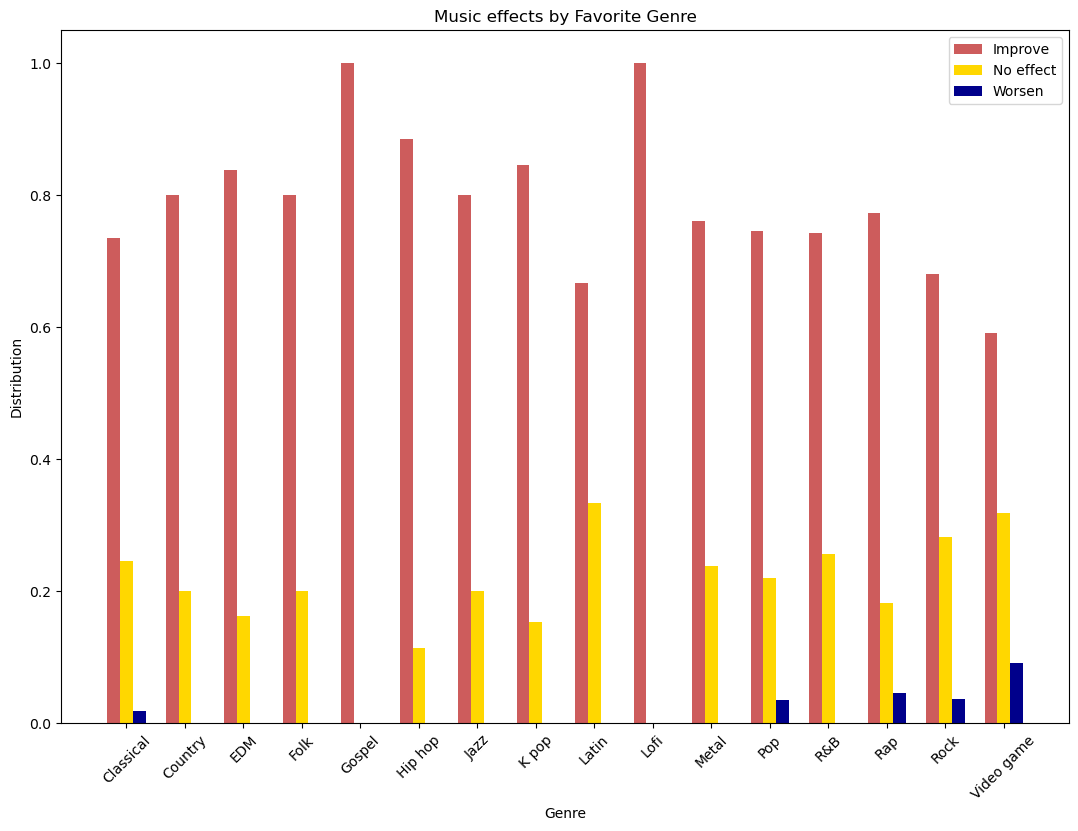

In [38]:
df.replace(['Video game music'],
                       ['Video game'], inplace=True)

g_all = df['Fav genre'].unique()
g_all.sort()
fg_df = df.groupby(['Fav genre'])
fg_dist = fg_df['Music effects'].value_counts(ascending=False, normalize=True).tolist()

insert_indices = [5, 8, 11, 13, 14, 17, 20, 23, 26, 28, 29, 32, 38]
for i in range(len(insert_indices)):
    fg_dist.insert(insert_indices[i], 0)

imp_dist = fg_dist[0::3]
no_eff_dist = fg_dist[1::3]
wors_dist = fg_dist[2::3]

width = 0.22

x = np.arange(len(g_all))

fig, ax = plt.subplots(figsize=(13, 9))

b1 = ax.bar(x-width, imp_dist, width, label="Improve", color = 'indianred')
b2 = ax.bar(x, no_eff_dist, width, label="No effect", color = 'gold')
b3 = ax.bar(x+width, wors_dist, width, label="Worsen", color = 'darkblue')

plt.title("Music effects by Favorite Genre")
ax.set_ylabel('Distribution')
ax.set_xlabel('Genre')
ax.set_xticks(x, g_all, rotation = 45)
ax.legend()

plt.show()


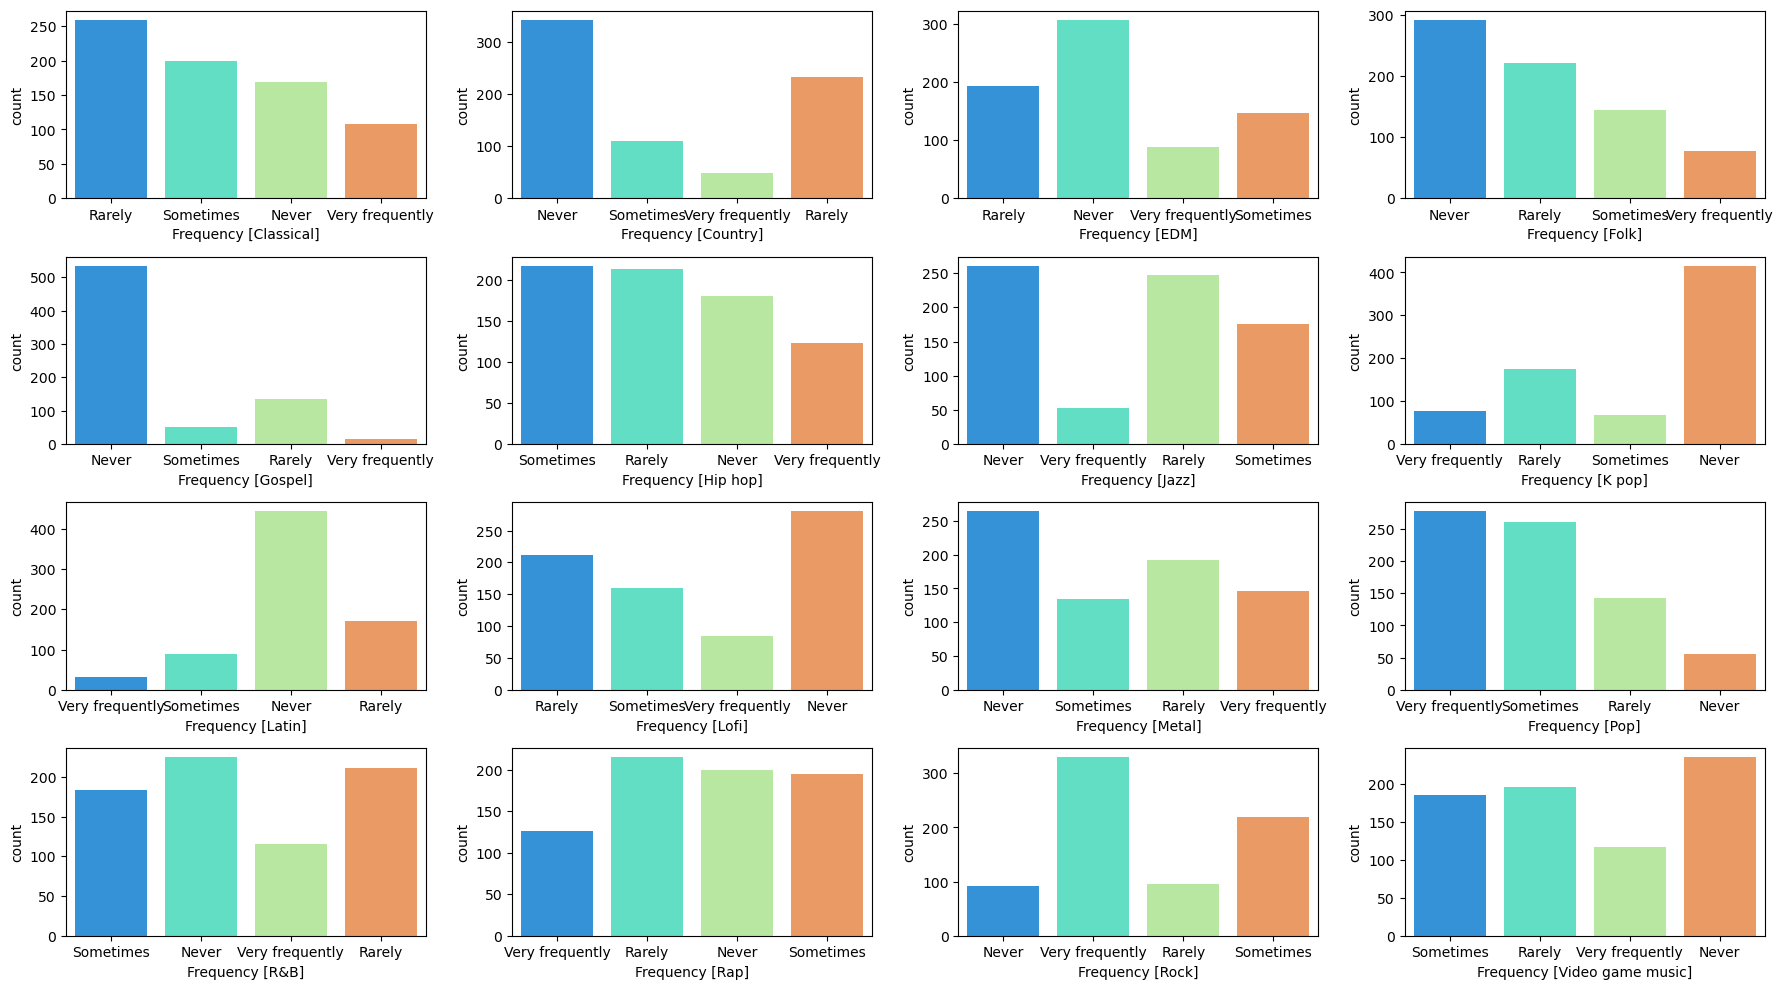

In [39]:
figure,axes=plt.subplots(4,4,figsize=(18,10))
sns.countplot(ax=axes[0,0],x=df['Frequency [Classical]'],palette="rainbow")
sns.countplot(ax=axes[0,1],x=df['Frequency [Country]'],palette="rainbow")

sns.countplot(ax=axes[0,2],x=df['Frequency [EDM]'],palette="rainbow")

sns.countplot(ax=axes[0,3],x=df['Frequency [Folk]'],palette="rainbow")

sns.countplot(ax=axes[1,0],x=df['Frequency [Gospel]'],palette="rainbow")

sns.countplot(ax=axes[1,1],x=df['Frequency [Hip hop]'],palette="rainbow")

sns.countplot(ax=axes[1,2],x=df['Frequency [Jazz]'],palette="rainbow")

sns.countplot(ax=axes[1,3],x=df['Frequency [K pop]'],palette="rainbow")

sns.countplot(ax=axes[2,0],x=df['Frequency [Latin]'],palette="rainbow")

sns.countplot(ax=axes[2,1],x=df['Frequency [Lofi]'],palette="rainbow")

sns.countplot(ax=axes[2,2],x=df['Frequency [Metal]'],palette="rainbow")

sns.countplot(ax=axes[2,3],x=df['Frequency [Pop]'],palette="rainbow")

sns.countplot(ax=axes[3,0],x=df['Frequency [R&B]'],palette="rainbow")

sns.countplot(ax=axes[3,1],x=df['Frequency [Rap]'],palette="rainbow")

sns.countplot(ax=axes[3,2],x=df['Frequency [Rock]'],palette="rainbow")

sns.countplot(ax=axes[3,3],x=df['Frequency [Video game music]'],palette="rainbow")


plt.tight_layout()

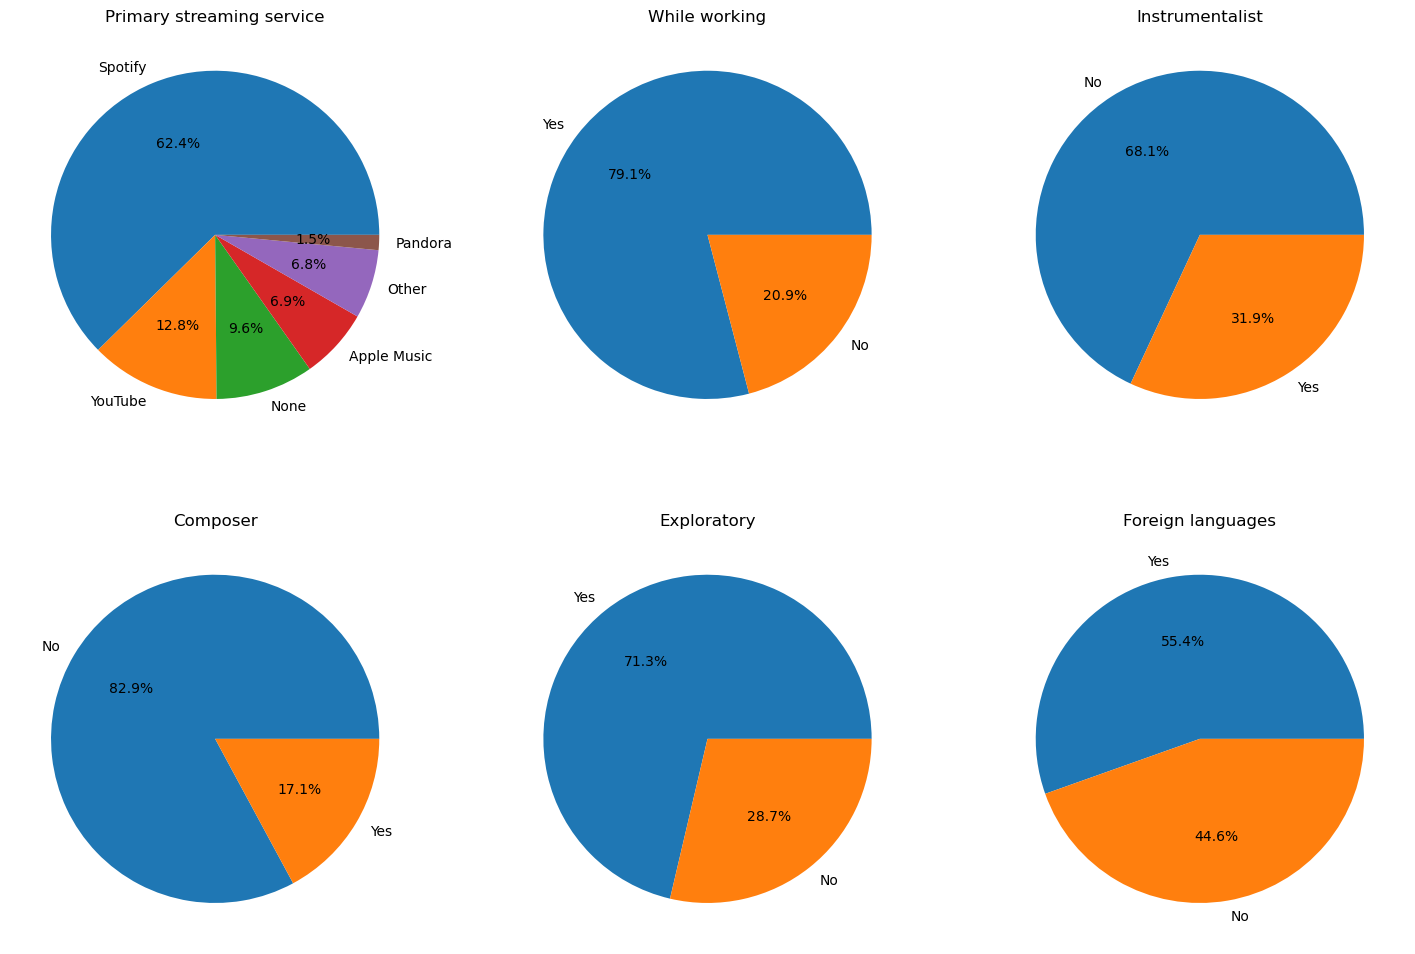

In [40]:
#i used pie charts to visualize the distribution of some columns
pieColumnNames=['Primary streaming service', 'While working', 'Instrumentalist', 'Composer', 'Exploratory',	'Foreign languages']
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

for i in range(len(pieColumnNames)):
  columnName = pieColumnNames[i]
  valueCount = df[columnName].value_counts()
  axes[i//3, i%3].pie(valueCount, labels=valueCount.index, autopct='%1.1f%%')
  axes[i//3, i%3].set_title(columnName)

# library for modelling 

In [41]:
#!pip install category_encoders

In [42]:
#! pip install catboost

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import category_encoders as ce
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [44]:
df

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,Frequency [Classical],...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
0,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,Rarely,...,Very frequently,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,Improve
1,43.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,Sometimes,...,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,Improve
2,18.0,Spotify,4.0,No,No,No,Video game,No,Yes,Never,...,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect
3,43.0,YouTube,2.5,Yes,No,Yes,Jazz,Yes,Yes,Sometimes,...,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve
4,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,Never,...,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,Very frequently,...,Very frequently,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve
732,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,Rarely,...,Very frequently,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve
733,19.0,Other,6.0,Yes,No,Yes,Rap,Yes,No,Rarely,...,Sometimes,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve
734,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,Very frequently,...,Never,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve


# Encode

In [45]:

le = LabelEncoder()
df['Music effects'] = le.fit_transform(df['Music effects'])

# Access the mapping
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

# Print the mapping
print("Label Mapping:")
print(label_mapping)

original_labels = le.inverse_transform([0, 1, 2])
print("Original Labels:")
print(original_labels)

Label Mapping:
{'Improve': 0, 'No effect': 1, 'Worsen': 2}
Original Labels:
['Improve' 'No effect' 'Worsen']


In [46]:
unique_values_service = df['Primary streaming service'].unique()
unique_values_service

array(['Spotify', 'Pandora', 'YouTube', 'None', 'Apple Music', 'Other'],
      dtype=object)

In [47]:
unique_values_genre = df['Fav genre'].unique()
unique_values_genre

array(['Latin', 'Rock', 'Video game', 'Jazz', 'R&B', 'K pop', 'Country',
       'EDM', 'Hip hop', 'Pop', 'Rap', 'Classical', 'Metal', 'Folk',
       'Lofi', 'Gospel'], dtype=object)

In [48]:
unique_values_frequency= df['Frequency [R&B]'].unique()
unique_values_frequency

array(['Sometimes', 'Never', 'Very frequently', 'Rarely'], dtype=object)

In [49]:
# Mapping for categorical variables
service_mapping = {"Spotify": 0, "Pandora": 1, "YouTube": 2, "Apple Music": 3, "Other": 4, "None": 5}
binary_mapping = {"Yes": 1, "No": 0}
genre_mapping = {"Classical": 0, "Country": 1, "EDM": 2, "Folk": 3, "Gospel": 4, "Hip hop": 5, "Jazz": 6, "K pop": 7,
                 "Latin": 8, "Lofi": 9, "Metal": 10, "Pop": 11, "R&B": 12, "Rap": 13, "Rock": 14, "Video game": 15}
frequency_mapping = {"Never": 0, "Rarely": 1, "Sometimes": 2, "Very frequently": 3}


# Mapping for specific columns
column_mappings = {
    "Primary streaming service": service_mapping,
    "While working": binary_mapping,
    "Instrumentalist": binary_mapping,
    "Composer": binary_mapping,
    "Exploratory": binary_mapping,
    "Foreign languages": binary_mapping,
    "Fav genre": genre_mapping,
    "Frequency [Classical]": frequency_mapping,
    "Frequency [Country]": frequency_mapping,
    "Frequency [EDM]": frequency_mapping,
    "Frequency [Folk]": frequency_mapping,
    "Frequency [Gospel]": frequency_mapping,
    "Frequency [Hip hop]": frequency_mapping,
    "Frequency [Jazz]": frequency_mapping,
    "Frequency [K pop]": frequency_mapping,
    "Frequency [Latin]": frequency_mapping,
    "Frequency [Lofi]": frequency_mapping,
    "Frequency [Metal]": frequency_mapping,
    "Frequency [Pop]": frequency_mapping,
    "Frequency [R&B]": frequency_mapping,
    "Frequency [Rap]": frequency_mapping,
    "Frequency [Rock]": frequency_mapping,
    "Frequency [Video game music]": frequency_mapping,
 
}

# Apply mappings to the dataset
df = df.replace(column_mappings)

In [50]:
df

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,Frequency [Classical],...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
0,18.0,0,3.0,1,1,1,8,1,1,1,...,3,2,3,0,2,3.0,0.0,1.0,0.0,0
1,43.0,1,1.5,1,0,0,14,1,0,2,...,2,2,1,3,1,7.0,2.0,2.0,1.0,0
2,18.0,0,4.0,0,0,0,15,0,1,0,...,1,0,1,1,3,7.0,7.0,10.0,2.0,1
3,43.0,2,2.5,1,0,1,6,1,1,2,...,2,2,0,0,0,9.0,7.0,3.0,3.0,0
4,18.0,0,4.0,1,0,0,12,1,0,0,...,2,3,3,0,1,7.0,2.0,5.0,9.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,17.0,0,2.0,1,1,0,14,1,1,3,...,3,0,1,3,0,7.0,6.0,0.0,9.0,0
732,18.0,0,1.0,1,1,0,11,1,1,1,...,3,0,0,2,2,3.0,2.0,2.0,5.0,0
733,19.0,4,6.0,1,0,1,13,1,0,1,...,2,2,2,1,1,2.0,2.0,2.0,2.0,0
734,19.0,0,5.0,1,1,0,0,0,0,3,...,0,0,0,0,2,2.0,3.0,2.0,1.0,0


# determine the variable that we want to investigate

In [51]:
df.corr()

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,Frequency [Classical],...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
Age,1.000000,0.230865,-0.112817,-0.116484,-0.156019,-0.064988,0.034870,-0.156634,-0.100835,0.102223,...,-0.174958,0.026167,-0.183473,0.113664,-0.231361,-0.141911,-0.071882,0.033543,-0.110005,0.074917
Primary streaming service,0.230865,1.000000,-0.103071,-0.104266,-0.040526,0.013713,0.041773,-0.249629,-0.152661,0.035467,...,-0.162251,-0.092492,-0.180439,-0.072881,-0.031379,-0.063767,-0.114605,-0.003179,-0.064353,0.050854
Hours per day,-0.112817,-0.103071,1.000000,0.320574,-0.024016,0.135278,-0.037677,0.165419,0.117253,-0.009346,...,-0.000093,0.124946,0.163999,0.070947,0.064726,0.080179,0.141736,0.153389,0.136029,-0.073140
While working,-0.116484,-0.104266,0.320574,1.000000,0.080039,0.047567,-0.017798,0.139238,0.116729,0.053030,...,0.077994,0.110416,0.081465,-0.000386,0.132567,0.039487,0.055855,0.037034,0.083072,-0.165183
Instrumentalist,-0.156019,-0.040526,-0.024016,0.080039,1.000000,0.400539,-0.116912,0.073282,-0.013320,0.245286,...,-0.107145,-0.110172,-0.118637,-0.010160,0.063276,0.027310,0.006157,0.025460,0.014111,-0.098826
Composer,-0.064988,0.013713,0.135278,0.047567,0.400539,1.000000,-0.061589,0.096692,-0.042438,0.097554,...,-0.046093,0.021490,-0.004403,0.049197,-0.008421,0.003176,0.050861,0.094605,0.012331,-0.085482
Fav genre,0.034870,0.041773,-0.037677,-0.017798,-0.116912,-0.061589,1.000000,-0.022755,0.015883,-0.196843,...,0.111270,0.059091,0.032158,0.291126,0.154308,0.065824,0.032745,0.010224,0.019891,0.129958
Exploratory,-0.156634,-0.249629,0.165419,0.139238,0.073282,0.096692,-0.022755,1.000000,0.181150,0.060261,...,0.175589,0.169743,0.236283,0.162513,0.027356,0.021250,0.061541,0.053356,0.032219,-0.144211
Foreign languages,-0.100835,-0.152661,0.117253,0.116729,-0.013320,-0.042438,0.015883,0.181150,1.000000,0.113675,...,0.076814,0.137282,0.163743,0.005749,0.199111,0.082017,0.089095,0.035613,-0.021165,-0.002936
Frequency [Classical],0.102223,0.035467,-0.009346,0.053030,0.245286,0.097554,-0.196843,0.060261,0.113675,1.000000,...,0.004832,-0.000129,-0.126568,-0.075124,0.103081,-0.047259,-0.008253,0.076474,-0.007941,0.021839


<AxesSubplot: >

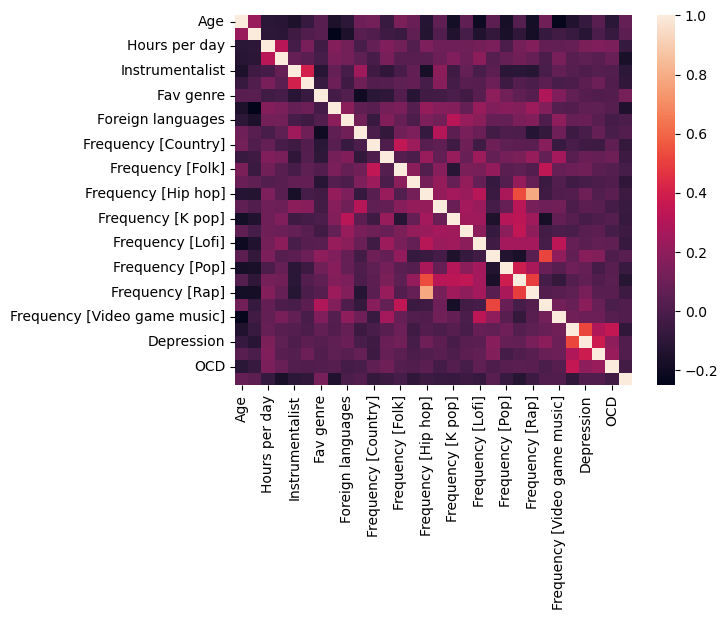

In [52]:
sns.heatmap(df.corr())

In [53]:
X = df.drop(['Music effects'], axis=1)
y = df['Music effects']


In [54]:
## Apply SMOTE to solve imbalancing data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [55]:


X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled,test_size=0.30,random_state=42)

## determine need to scaling or not

In [56]:
df.describe()

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,Frequency [Classical],...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
count,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,...,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000
mean,23.925553,1.232337,3.380503,0.790761,0.319293,0.171196,9.423913,0.713315,0.554348,1.335598,...,2.031250,1.259511,1.335598,2.070652,1.250000,5.837636,4.796196,3.738451,2.637228,0.275815
std,8.421012,1.770226,2.376208,0.407042,0.466520,0.376936,4.829859,0.452521,0.497376,0.988442,...,0.934801,1.058451,1.053732,1.034327,1.071587,2.793054,3.028870,3.088689,2.842017,0.496257
min,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,2.000000,1.000000,0.000000,0.000000,5.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,4.000000,2.000000,1.000000,0.000000,0.000000
50%,21.000000,0.000000,3.000000,1.000000,0.000000,0.000000,11.000000,1.000000,1.000000,1.000000,...,2.000000,1.000000,1.000000,2.000000,1.000000,6.000000,5.000000,3.000000,2.000000,0.000000
75%,28.000000,2.000000,5.000000,1.000000,1.000000,0.000000,14.000000,1.000000,1.000000,2.000000,...,3.000000,2.000000,2.000000,3.000000,2.000000,8.000000,7.000000,6.000000,5.000000,1.000000
max,43.000000,5.000000,9.500000,1.000000,1.000000,1.000000,15.000000,1.000000,1.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,10.000000,10.000000,10.000000,10.000000,2.000000


In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [58]:
#!pip install lazypredict


In [59]:
from lazypredict.Supervised import LazyClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split


In [60]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train_scaled, X_test_scaled, y_train, y_test)

print(models)

 97%|█████████▋| 28/29 [00:02<00:00, 14.06it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000749 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1649
[LightGBM] [Info] Number of data points in the train set: 1155, number of used features: 29
[LightGBM] [Info] Start training from score -1.114319
[LightGBM] [Info] Start training from score -1.065404
[LightGBM] [Info] Start training from score -1.116961


100%|██████████| 29/29 [00:02<00:00,  9.71it/s]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
LGBMClassifier                     0.90               0.90    None      0.90   
XGBClassifier                      0.89               0.89    None      0.89   
ExtraTreesClassifier               0.88               0.88    None      0.88   
RandomForestClassifier             0.88               0.88    None      0.88   
SVC                                0.87               0.87    None      0.87   
NuSVC                              0.85               0.85    None      0.85   
QuadraticDiscriminantAnalysis      0.85               0.85    None      0.85   
BaggingClassifier                  0.85               0.85    None      0.85   
LabelPropagation                   0.83               0.83    None      0.82   
LabelSpreading                     0.83               0.83    None      0.82   
KNeighborsClassifier               0.78 

In [61]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report
import time

In [62]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report



In [63]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [64]:
lgbm_classifier_best = LGBMClassifier(random_state=42)


# Train the model
lgbm_classifier_best.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_lgbm = lgbm_classifier_best.predict(X_test_scaled)


# Evaluate the model
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
print(f"Accuracy for LightGBM Classifier: {accuracy_lgbm:.2f}")


precision_lgbm = precision_score(y_test, y_pred_lgbm,average='weighted')
recall_lgbm = recall_score(y_test, y_pred_lgbm,average='weighted')
f1_lgbm = f1_score(y_test, y_pred_lgbm,average='weighted')

# Print classification report
print("Classification Report for LightGBM Classifier:")
print(classification_report(y_test, y_pred_lgbm))



[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000261 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1649
[LightGBM] [Info] Number of data points in the train set: 1155, number of used features: 29
[LightGBM] [Info] Start training from score -1.114319
[LightGBM] [Info] Start training from score -1.065404
[LightGBM] [Info] Start training from score -1.116961
Accuracy for LightGBM Classifier: 0.90
Classification Report for LightGBM Classifier:
              precision    recall  f1-score   support

           0       0.88      0.83      0.85       171
           1       0.82      0.86      0.84       152
           2       0.99      0.99      0.99       172

    accuracy                           0.90       495
   macro avg       0.89      0.90      0.89       495
weighted avg       0.90      0.90      0.90       495



In [65]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Initialize the XGBoost Classifier
xgb_classifier = xgb.XGBClassifier(random_state=42)

# Define the parameter grid to search
param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 150],
}

# Initialize GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid_xgb, cv=3, scoring='accuracy')

# Perform GridSearchCV on the training data
grid_search_xgb.fit(X_train_scaled, y_train)

# Get the best parameters and model
best_params_xgb = grid_search_xgb.best_params_
print("Best Parameters for XGBoost Classifier:", best_params_xgb)



Best Parameters for XGBoost Classifier: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 150}


In [66]:
xgb_classifier_best = xgb.XGBClassifier(learning_rate=0.2, max_depth=7, n_estimators=150,random_state=42)

xgb_classifier_best.fit(X_train_scaled, y_train)
# Make predictions on the test set using the best model
y_pred_xgb = xgb_classifier_best.predict(X_test_scaled)

# Evaluate the best model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Best Model Accuracy for XGBoost Classifier: {accuracy_xgb:.2f}")

precision_xgb = precision_score(y_test, y_pred_xgb,average='weighted')
recall_xgb = recall_score(y_test, y_pred_xgb,average='weighted')
f1_xgb = f1_score(y_test, y_pred_xgb,average='weighted')


# Print classification report
print("Classification Report for XGBoost Classifier:")
print(classification_report(y_test, y_pred_xgb))


Best Model Accuracy for XGBoost Classifier: 0.89
Classification Report for XGBoost Classifier:
              precision    recall  f1-score   support

           0       0.90      0.81      0.85       171
           1       0.81      0.88      0.85       152
           2       0.97      0.99      0.98       172

    accuracy                           0.89       495
   macro avg       0.89      0.89      0.89       495
weighted avg       0.90      0.89      0.89       495



In [67]:
from sklearn.ensemble import ExtraTreesClassifier

# Initialize the Extra Trees Classifier
et_classifier = ExtraTreesClassifier(random_state=42)

param_grid_et = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_et = GridSearchCV(estimator=et_classifier, param_grid=param_grid_et, cv=3, scoring='accuracy')
grid_search_et.fit(X_train_scaled, y_train)

best_params_et = grid_search_et.best_params_
print("Best Parameters for Extra Trees Classifier:", best_params_et)


Best Parameters for Extra Trees Classifier: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


In [68]:
et_classifier_best = ExtraTreesClassifier(max_depth=20, min_samples_leaf=1, min_samples_split= 2, n_estimators=150, random_state=42)

et_classifier_best.fit(X_train_scaled, y_train)

# Make predictions on the test set using the best model
y_pred_et = et_classifier_best.predict(X_test_scaled)

# Evaluate the best model
accuracy_et = accuracy_score(y_test, y_pred_et)
print(f"Best Model Accuracy for Extra Trees Classifier: {accuracy_et:.2f}")

precision_et = precision_score(y_test, y_pred_et,average='weighted')
recall_et = recall_score(y_test, y_pred_et,average='weighted')
f1_et = f1_score(y_test, y_pred_et,average='weighted')


# Print classification report
print("Classification Report for Extra Trees Classifier:")
print(classification_report(y_test, y_pred_et))


Best Model Accuracy for Extra Trees Classifier: 0.89
Classification Report for Extra Trees Classifier:
              precision    recall  f1-score   support

           0       0.87      0.80      0.83       171
           1       0.79      0.87      0.83       152
           2       0.99      0.99      0.99       172

    accuracy                           0.89       495
   macro avg       0.89      0.89      0.88       495
weighted avg       0.89      0.89      0.89       495



In [69]:
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid to search
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_classifier, param_grid=param_grid_rf, cv=3, scoring='accuracy')

# Perform GridSearchCV on the training data
grid_search_rf.fit(X_train_scaled, y_train)

# Get the best parameters and model
best_params_rf = grid_search_rf.best_params_
print("Best Parameters for Random Forest Classifier:", best_params_rf)

Best Parameters for Random Forest Classifier: {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


In [70]:
rf_classifier_best = RandomForestClassifier(max_depth=20, max_features='log2', min_samples_leaf=1, min_samples_split=2, n_estimators=150,random_state=42)
#rf_classifier_best = RandomForestClassifier(max_depth=None, max_features='log2', min_samples_leaf=1, min_samples_split=2, n_estimators=100,random_state=42)
# Train the model
rf_classifier_best.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_rf = rf_classifier_best.predict(X_test_scaled)

# Evaluate the best model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Best Model Accuracy for Random Forest Classifier: {accuracy_rf:.2f}")

precision_rf  = precision_score(y_test, y_pred_rf,average='weighted')
recall_rf  = recall_score(y_test, y_pred_rf,average='weighted')
f1_rf  = f1_score(y_test, y_pred_rf,average='weighted')



# Print classification report
print("Classification Report for Random Forest Classifier:")
print(classification_report(y_test, y_pred_rf))


Best Model Accuracy for Random Forest Classifier: 0.88
Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.88      0.78      0.83       171
           1       0.78      0.87      0.82       152
           2       0.99      0.99      0.99       172

    accuracy                           0.88       495
   macro avg       0.88      0.88      0.88       495
weighted avg       0.89      0.88      0.88       495



In [71]:
from sklearn.svm import SVC

param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]
}

# Initialize SVC
svc_classifier = SVC(random_state=42)

# Initialize GridSearchCV
grid_search_svc = GridSearchCV(estimator=svc_classifier, param_grid=param_grid_svc, cv=3, scoring='accuracy')

# Perform GridSearchCV on the training data
grid_search_svc.fit(X_train_scaled, y_train)

# Get the best parameters 
best_params_svc = grid_search_svc.best_params_
print("Best Parameters for SVC:", best_params_svc)

Best Parameters for SVC: {'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}


In [72]:
svc_classifier_best = SVC(C=10, degree=2, gamma='scale', kernel='rbf',random_state=42)

# Train the model
svc_classifier_best.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_svc = svc_classifier_best.predict(X_test_scaled)

# Evaluate the best model
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f"Best Model Accuracy for SVC: {accuracy_svc:.2f}")

precision_svc  = precision_score(y_test, y_pred_svc,average='weighted')
recall_svc  = recall_score(y_test, y_pred_svc, average='weighted')
f1_svc  = f1_score(y_test, y_pred_svc, average='weighted')




# Print classification report
print("Classification Report for SVC:")
print(classification_report(y_test, y_pred_svc))


Best Model Accuracy for SVC: 0.87
Classification Report for SVC:
              precision    recall  f1-score   support

           0       0.88      0.75      0.81       171
           1       0.76      0.88      0.82       152
           2       0.98      0.99      0.99       172

    accuracy                           0.87       495
   macro avg       0.87      0.87      0.87       495
weighted avg       0.88      0.87      0.87       495



In [73]:
import pandas as pd

models = [
    'LightGBM Classifier',
    'XGBoost Classifier',
    'Extra Trees Classifier',
    'Random Forest Classifier',
    'SVC'
]

accuracy_scores = [
    accuracy_lgbm,
    accuracy_xgb,
    accuracy_et,
    accuracy_rf,
    accuracy_svc
]

precision_scores = [
    precision_lgbm,
    precision_xgb,
    precision_et,
    precision_rf,
    precision_svc
]

recall_scores = [
    recall_lgbm,
    recall_xgb,
    recall_et,
    recall_rf,
    recall_svc
]

f1_scores = [
    f1_lgbm,
    f1_xgb,
    f1_et,
    f1_rf,
    f1_svc
]

# Create a DataFrame
results_df = pd.DataFrame({
    'Model Name': models,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1': f1_scores
})

# Set the display precision to 4 decimal places
pd.set_option('display.float_format', '{:.4f}'.format)

# Sort the DataFrame by 'Accuracy' in descending order
results_df = results_df.sort_values(by='Accuracy', ascending=False)

# Set the 'Model Name' column as the index
results_df = results_df.set_index('Model Name')

# Print the sorted and formatted results DataFrame
results_df


,Accuracy,Precision,Recall,F1
Model Name,,,,
LightGBM Classifier,0.8970,0.8977,0.8970,0.8969
XGBoost Classifier,0.8949,0.8965,0.8949,0.8945
Extra Trees Classifier,0.8869,0.8893,0.8869,0.8869
Random Forest Classifier,0.8828,0.8864,0.8828,0.8828
SVC,0.8747,0.8794,0.8747,0.8743


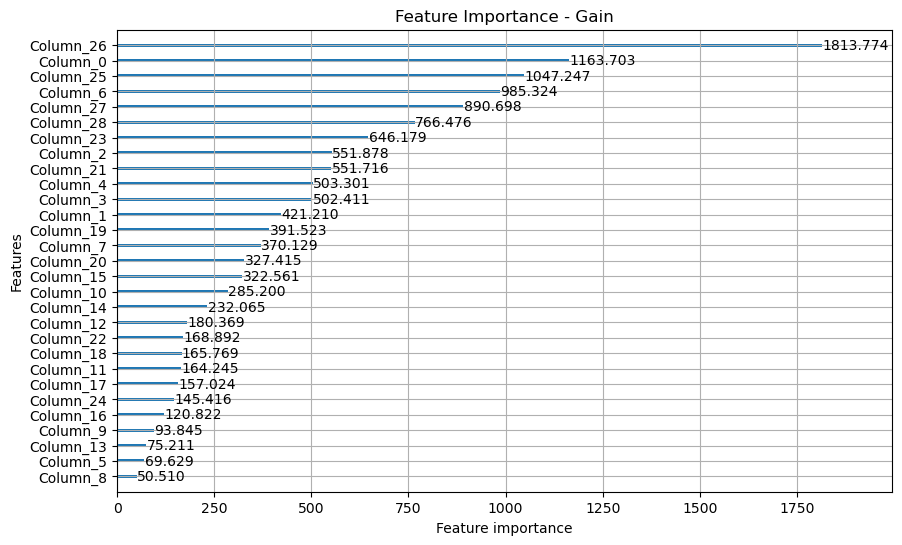

In [74]:

import lightgbm as lgb
import matplotlib.pyplot as plt



# Plot feature importance
lgb.plot_importance(lgbm_classifier_best, figsize=(10, 6), importance_type='gain')
plt.title('Feature Importance - Gain')
plt.show()


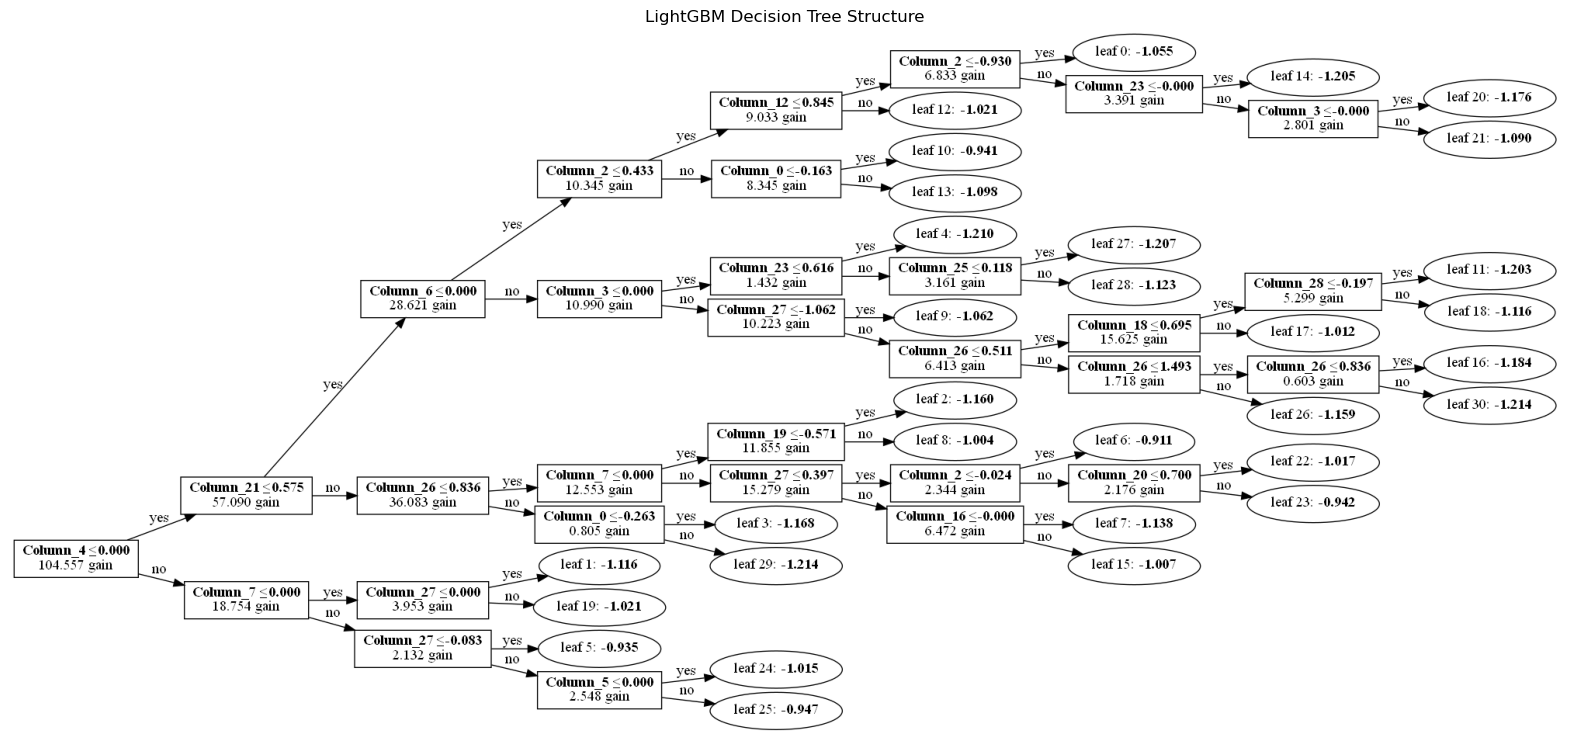

In [75]:
import lightgbm as lgb
import matplotlib.pyplot as plt

lgb.plot_tree(lgbm_classifier_best, tree_index=0, figsize=(20, 10), show_info=['split_gain'])
plt.title('LightGBM Decision Tree Structure')
plt.show()


While working, Instrumentalist, Composer, Exploratory,	Foreign languages : \
"Yes": 1, "No": 0

Fav genre：\
"Classical": 0, "Country": 1, "EDM": 2, "Folk": 3, "Gospel": 4, "Hip hop": 5, "Jazz": 6, "K pop": 7, "Latin": 8, "Lofi": 9, "Metal": 10, "Pop": 11, "R&B": 12, "Rap": 13, "Rock": 14, "Video game music": 15

Frequency [Classical] , Frequency [Country], Frequency [EDM], Frequency [Folk], Frequency [Gospel], Frequency [Hip hop], Frequency [Jazz], Frequency [K pop], Frequency [Latin], Frequency [Lofi], Frequency [Metal], Frequency [Pop], Frequency [R&B], Frequency [Rap], Frequency [Rock], Frequency [Video game music] : \
"Never": 0, "Rarely": 1, "Sometimes": 2, "Very frequently": 3 

Primary streaming service :\
"Spotify": 0, "Pandora": 1, "YouTube Music": 2, "Apple Music": 3, "Other streaming service": 4, "I do not use a streaming service.": 5

### Extra Trees Model

In [76]:
import tkinter as tk
from tkinter import messagebox
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

class ExtraTreesGUI:
    def __init__(self, root):
        self.root = root
        self.root.title("Extra Trees Model GUI")

   
        label_encoder = LabelEncoder()
        for column in df.columns:
            if df[column].dtype == 'object':
                df[column] = label_encoder.fit_transform(df[column].astype(str))

        # Split the data into features and target variable
        X = df.drop('Music effects', axis=1)
        y = df['Music effects']

        # Apply SMOTE to handle class imbalance
        smote = SMOTE(random_state=42)
        X_resampled, y_resampled = smote.fit_resample(X, y)

        # Split the resampled data into training and testing sets
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

        # Create and train the Extra Trees model
        self.model = ExtraTreesClassifier(n_estimators=150, max_depth=20, min_samples_leaf=1, min_samples_split=2, random_state=42)
        self.model.fit(self.X_train, self.y_train)

        # Create GUI components
        self.create_gui()

    def create_gui(self):
        # Create a canvas widget and a vertical scrollbar
        canvas = tk.Canvas(self.root)
        scrollbar = tk.Scrollbar(self.root, orient="vertical", command=canvas.yview)
        # Create a frame inside the canvas and attach the scrollbar to the canvas
        scrollable_frame = tk.Frame(canvas)
        canvas.create_window((0, 0), window=scrollable_frame, anchor="nw")
        canvas.configure(yscrollcommand=scrollbar.set)
        # Bind the configure event of the canvas to a function that updates the scroll region
        canvas.bind("<Configure>", lambda e: canvas.configure(scrollregion=canvas.bbox("all")))
        # Pack the canvas and the scrollbar
        canvas.pack(side="left", fill="both", expand=True)
        scrollbar.pack(side="right", fill="y")

        # Create entry fields for each feature in the scrollable frame
        for column in self.X_train.columns:
            frame = tk.Frame(scrollable_frame)
            frame.pack(side="top", fill="x", padx=10, pady=5)

            label = tk.Label(frame, text=column)
            label.pack(side="left")

            entry = tk.Entry(frame)
            entry.pack(side="left", padx=5)

            # Save entry in an instance variable for later access
            setattr(self, f"{column}_entry", entry)

        # Create predict button in the scrollable frame
        self.predict_button = tk.Button(scrollable_frame, text="Predict", command=self.predict)
        self.predict_button.pack(pady=10)

        # Result label in the scrollable frame
        self.result_label = tk.Label(scrollable_frame, text="")
        self.result_label.pack()

    def predict(self):
        # Get user input from entry fields
        user_input = [float(getattr(self, f"{column}_entry").get()) for column in self.X_train.columns]

        # Make predictions using the trained model
        prediction = self.model.predict([user_input])[0]

        # Display the prediction
        self.result_label.config(text=f"The predicted music effect is: {prediction}")


if __name__ == "__main__":
    root = tk.Tk()
    app = ExtraTreesGUI(root)
    root.mainloop()


Label Mapping:
{'Improve': 0, 'No effect': 1, 'Worsen': 2}
Original Labels:
['Improve' 'No effect' 'Worsen']

Best Model Accuracy for Extra Trees Classifier: 0.89
Classification Report for Extra Trees Classifier:
              precision    recall  f1-score   support

           0       0.87      0.80      0.83       171
           1       0.79      0.87      0.83       152
           2       0.99      0.99      0.99       172

    accuracy                           0.89       495
   macro avg       0.89      0.89      0.88       495
weighted avg       0.89      0.89      0.89       495



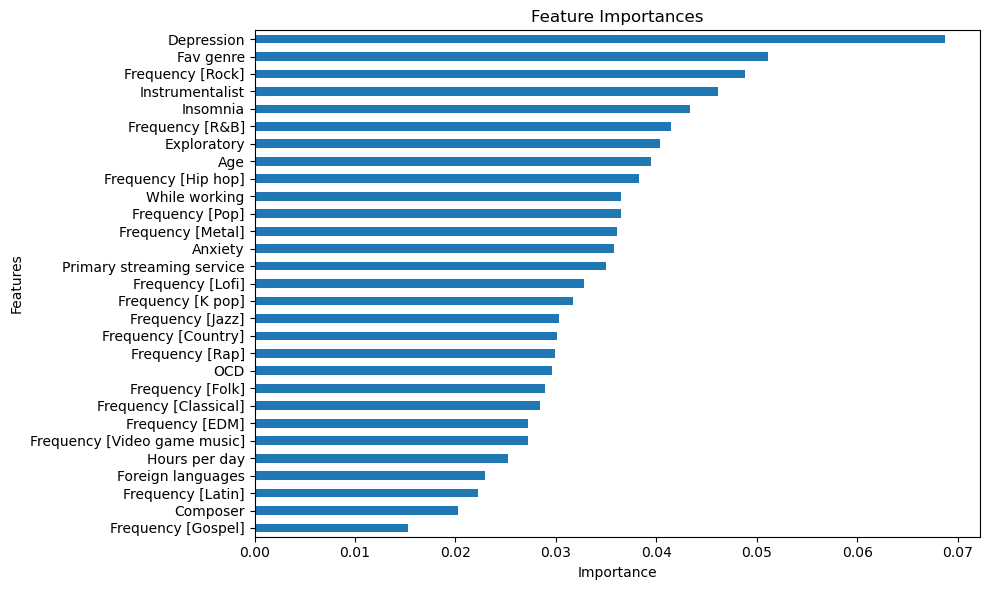

In [77]:
et_classifier_best = ExtraTreesClassifier(max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=150, random_state=42)
et_classifier_best.fit(X_train_scaled, y_train)

# Make predictions on the test set using the best model
y_pred_et = et_classifier_best.predict(X_test_scaled)

# Evaluate the best model
accuracy_et = accuracy_score(y_test, y_pred_et)
print(f"Best Model Accuracy for Extra Trees Classifier: {accuracy_et:.2f}")

precision_et = precision_score(y_test, y_pred_et, average='weighted')
recall_et = recall_score(y_test, y_pred_et, average='weighted')
f1_et = f1_score(y_test, y_pred_et, average='weighted')

# Print classification report
print("Classification Report for Extra Trees Classifier:")
print(classification_report(y_test, y_pred_et))

# Plotting feature importances as a vertical bar chart
feature_importances = pd.Series(et_classifier_best.feature_importances_, index=df.drop('Music effects', axis=1).columns)
sorted_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sorted_importances.plot(kind='barh')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()